LetsGrowMore

Advanced Level Task 1: Develop A Neural Network That Can Read Handwriting

Done By: Yash Rai

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
# Loading the Dataset
mnist = tf.keras.datasets.mnist

In [3]:
# Dividing the Images and their Outputs into x_train and x_test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


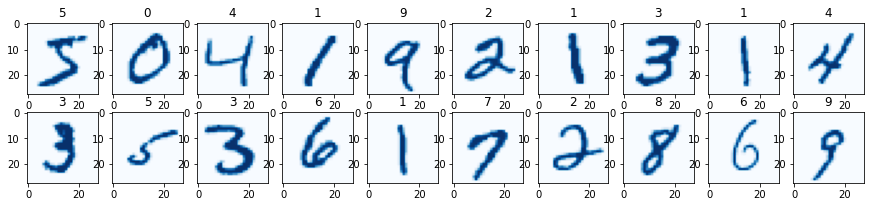

In [4]:
# Checking the Dataset Images that need to be identified by the Neural Network
fig = plt.figure(figsize = (15, 3))
for i in range(20):
  ax = fig.add_subplot(2,10, i+1)
  ax.imshow(np.squeeze(x_train[i]), cmap = 'Blues')
  ax.set_title(y_train[i])

In [5]:
# Printing the Data Images in Metrics form
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [6]:
# Normalizing the Matrix Array of Number Images
xtrain = x_train/255.0
xtest = x_test/255.0

In [7]:
# Flattening the 2-Dimensional Array into 1-Dimensional Array or a Single Column, which will behave as 1st Inpur Layer for Neural Network
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)), tf.keras.layers.Dense(128, activation = 'relu'), tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Using of AdamOptimizer
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
# Fitting of the Training Data into the Model for 5 Iterations
# 98% Accuracy achieved with 5 iterations
model.fit(xtrain, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2553 - accuracy: 0.9275
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1144 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0790 - accuracy: 0.9759
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0580 - accuracy: 0.9823
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0458 - accuracy: 0.9855


In [11]:
# Fitting of the Training Data into the Model for 9 Iterations
# 99% Accuracy achieved with 9 iterations
model.fit(xtrain, y_train, epochs = 9)

Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0357 - accuracy: 0.9889
Epoch 2/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0294 - accuracy: 0.9908
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0228 - accuracy: 0.9929
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0200 - accuracy: 0.9937
Epoch 5/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0149 - accuracy: 0.9956
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0130 - accuracy: 0.9961
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0112 - accuracy: 0.9969
Epoch 8/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0118 - accuracy: 0.9959
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0082 - accuracy: 0.9975


In [12]:
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 21.1964 - accuracy: 0.9768
[21.19639778137207, 0.9768000245094299]


In [13]:
# # 97 % of Total Accuracy of our Neural Network has been achieved
history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 5.1270 - accuracy: 0.9894 - val_loss: 1.8762 - val_accuracy: 0.9947
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 1.8979 - accuracy: 0.9941 - val_loss: 1.7048 - val_accuracy: 0.9958
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.9996 - accuracy: 0.9946 - val_loss: 3.1672 - val_accuracy: 0.9935
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.7824 - accuracy: 0.9949 - val_loss: 4.0978 - val_accuracy: 0.9935
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.6511 - accuracy: 0.9954 - val_loss: 3.9365 - val_accuracy: 0.9928
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.5897 - accuracy: 0.9955 - val_loss: 2.5225 - val_accuracy: 0.9933
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 2.0127 - accuracy: 0.9941 - val_loss: 3.5064 - val_accuracy:

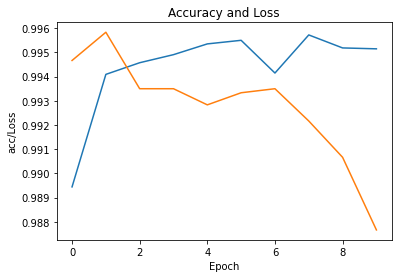

In [14]:
# Plotting Accuracy of Model
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history["val_accuracy"], label = 'val')
plt.show()

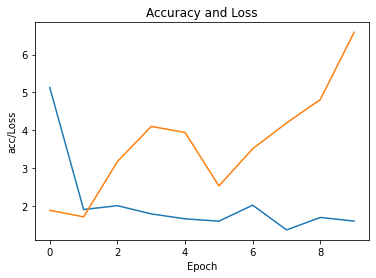

In [15]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'], label = 'acc')
plt.plot(history.history["val_loss"], label = 'val')
plt.show()

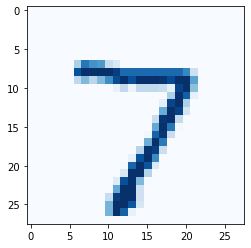

In [16]:
# Testing Our Model
plt.imshow(np.squeeze(x_test[0]), cmap = "Blues")

In [17]:
prediction = model.predict(x_test)
print(np.argmax(prediction[0]))

7


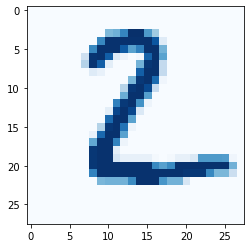

In [18]:
plt.imshow(np.squeeze(x_test[1]), cmap = "Blues")

In [19]:
prediction = model.predict(x_test)
print(np.argmax(prediction[1]))

2


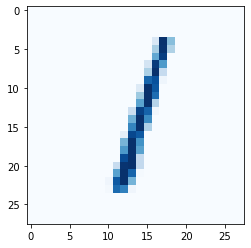

In [20]:
plt.imshow(np.squeeze(x_test[2]), cmap = "Blues")

In [21]:
prediction = model.predict(x_test)
print(np.argmax(prediction[2]))

1


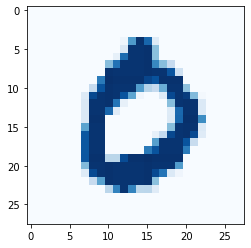

In [22]:
plt.imshow(np.squeeze(x_test[3]), cmap = "Blues")

In [ ]:
prediction = model.predict(x_test)
print(np.argmax(prediction[3]))